# ARIMA Forecasting

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


A quick inspection at data reveal we have only data for first 12 days of first month of every year starting 1992. We forecast the Coal.SA series

In [2]:
df = pd.read_csv("coal-25082020.csv")
df.Date = pd.to_datetime(df.Date, dayfirst=True)
df = df.sort_values(by='Date')
#df = df.set_index('Date')
df.head()

,Date,Coal.Australia,Coal.SA,CrudeOil,Fuel.Index,NaturalGas,Coal.Producer.Index,Gold,Silver,Copper,IronOre,CrudeOil.Index,Metal.Index,NonFuel.Index,Commodity.Index,CLI,CCI,BCI
0,1992-01-01,39.5,31.0,17.38,23.71,1.28,93.6,354.45,4.11,2139.23,33.1,40.23,35.59,48.40,50.72,99.20515,99.36520,99.32731
1,1992-01-02,39.5,31.0,17.62,23.83,1.21,93.8,353.91,4.15,2205.97,33.1,41.09,37.12,48.71,50.72,99.22767,99.46713,99.51028
2,1992-01-03,39.5,31.0,17.45,23.79,1.28,93.6,344.34,4.11,2227.33,33.1,41.17,37.41,48.74,50.75,99.25694,99.62660,99.67402
3,1992-01-04,39.5,31.0,18.63,25.24,1.47,94.1,338.62,4.05,2215.33,33.1,44.09,38.00,48.45,51.17,99.26983,99.72688,99.74699
4,1992-01-05,39.5,31.0,19.50,26.33,1.59,94.7,337.24,4.07,2216.52,33.1,45.57,37.99,48.57,52.64,99.23967,99.75301,99.77460


In [3]:
df=df.drop(['Coal.Australia', 'Gold','Silver','Copper','IronOre','CrudeOil','Fuel.Index','NaturalGas','Coal.Producer.Index','CrudeOil.Index','Metal.Index','NonFuel.Index','Commodity.Index','CLI','CCI','BCI'], axis=1)
df.head()

,Date,Coal.SA
0,1992-01-01,31.0
1,1992-01-02,31.0
2,1992-01-03,31.0
3,1992-01-04,31.0
4,1992-01-05,31.0


EDA:
Plotting "trend". Visualize and check seasonality trend of our time series.

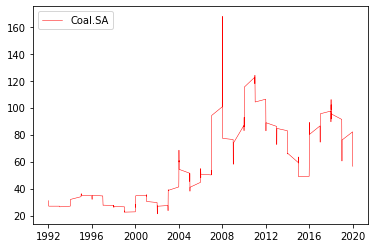

In [4]:
plt.plot(df.Date, df['Coal.SA'], linewidth=0.5, color='red')
plt.legend(["Coal.SA"], loc ="upper left") 
plt.show()

We can see that:
1) Coal series has a trend. It goes up for few years and then goes down for some year and then again goes up. It's not stationary

We can check stationarity using the following methods: (not implemented here as it is clear to know it's stationary)
   1) Dickey-Fuller Test: The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the test statistic is less than the critical value, we can say that time series is stationary.
  
   2) Plotting Rolling Statistics: We have a window lets say window size is 6 and then we find rolling mean and variance to check stationary.
   

In [5]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Day'] = pd.DatetimeIndex(df['Date']).day
#df.head()

Let's plot the mean year wise. It reveal that indeed the timeseries is not stationary.

<AxesSubplot:xlabel='Year'>

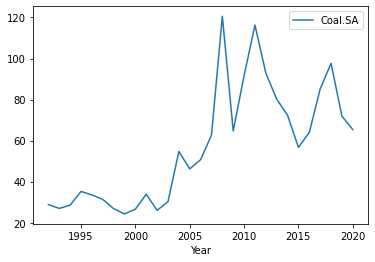

In [6]:
mean_all=df.groupby('Year').mean()
mean_all = mean_all.drop(['Day'], axis=1)
mean_all.plot()

First plot boxplots for each year to examine outliers:

[Text(0, 0, '1992'),
 Text(1, 0, '1993'),
 Text(2, 0, '1994'),
 Text(3, 0, '1995'),
 Text(4, 0, '1996'),
 Text(5, 0, '1997'),
 Text(6, 0, '1998'),
 Text(7, 0, '1999'),
 Text(8, 0, '2000'),
 Text(9, 0, '2001'),
 Text(10, 0, '2002'),
 Text(11, 0, '2003'),
 Text(12, 0, '2004'),
 Text(13, 0, '2005'),
 Text(14, 0, '2006'),
 Text(15, 0, '2007'),
 Text(16, 0, '2008'),
 Text(17, 0, '2009'),
 Text(18, 0, '2010'),
 Text(19, 0, '2011'),
 Text(20, 0, '2012'),
 Text(21, 0, '2013'),
 Text(22, 0, '2014'),
 Text(23, 0, '2015'),
 Text(24, 0, '2016'),
 Text(25, 0, '2017'),
 Text(26, 0, '2018'),
 Text(27, 0, '2019'),
 Text(28, 0, '2020')]

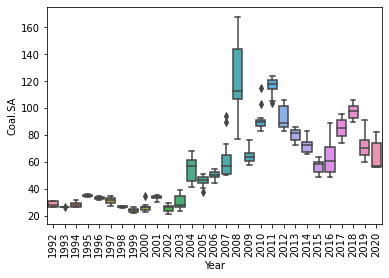

In [7]:
ax = sns.boxplot(data=df, x='Year', y='Coal.SA')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Now, let's plot boxplots for each day to check any outliers. These outliers can be removed for better forecasting results!

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12')]

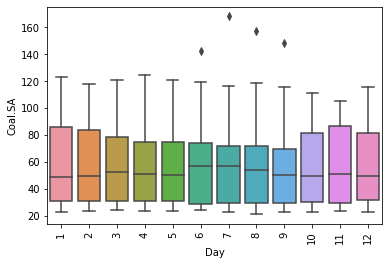

In [8]:
ax = sns.boxplot(data=df, x='Day', y='Coal.SA')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [9]:
dfnew = df.drop(['Year','Day'], axis=1)
dfnew = dfnew.set_index('Date')
#dfnew.head()

Using the differencing method to make the time series stationary

<AxesSubplot:title={'center':'trend before & after differencing'}, xlabel='Date'>

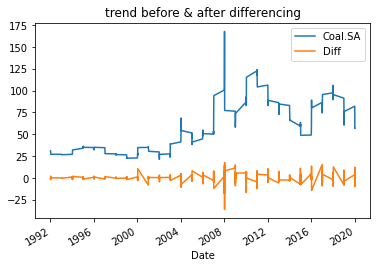

In [10]:
import numpy as np
#dfnew['Diff'] = dfnew- dfnew.shift(1)
dfnew['Diff'] = np.append([np.nan]*2,np.diff(dfnew['Coal.SA'], n=2))
dfnew.dropna().plot(title="trend before & after differencing")
#dfnew has two columns before and after differencing

We can see from graph that it's stationary now

In [11]:
ts = dfnew.drop(['Diff'], axis =1)
#ts

In [12]:
dfnew.reset_index(level=0, inplace=True)
dfnew['Year'] = pd.DatetimeIndex(dfnew['Date']).year
dfnew.groupby('Year').mean()
#just to have a look at the means year-wise
#And plotting these values below

,Coal.SA,Diff
Year,,
1992,28.833333,0.000000
1993,26.958333,-0.041667
1994,28.562500,0.166667
1995,35.229167,-0.213333
1996,33.517500,0.163333
1997,31.349167,-0.070000
1998,26.839167,-0.005000
1999,24.273333,-0.076667
2000,26.570000,0.787500


<AxesSubplot:title={'center':'mean values'}, xlabel='Year'>

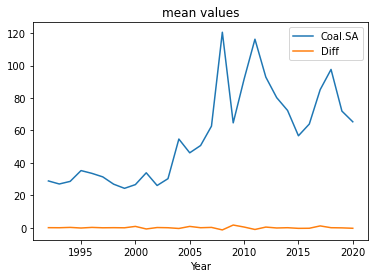

In [13]:
dfnew.reset_index(level=0, inplace=True)
dfnew['Year'] = pd.DatetimeIndex(dfnew['Date']).year
dfnew = dfnew.drop("index", axis=1)
meandf = dfnew.groupby('Year').mean()
meandf.plot(title="mean values")

In [14]:
ts_diff = dfnew.drop(['Coal.SA','Year'], axis=1)
ts_diff = ts_diff.set_index('Date')
ts_diff.dropna(inplace=True)
#ts_diff

# ARIMA

(p,d,q) is parameters of ARIMA model.

In order to choose p,d,q parameters we will use two different plots.

1) Autocorrelation Function (ACF): Measurement of the correlation between time series and lagged version of time series.

2) Partial Autocorrelation Function (PACF): This measures the correlation between the time series and lagged version of time series but after eliminating the variations already explained by the intervening comparisons.



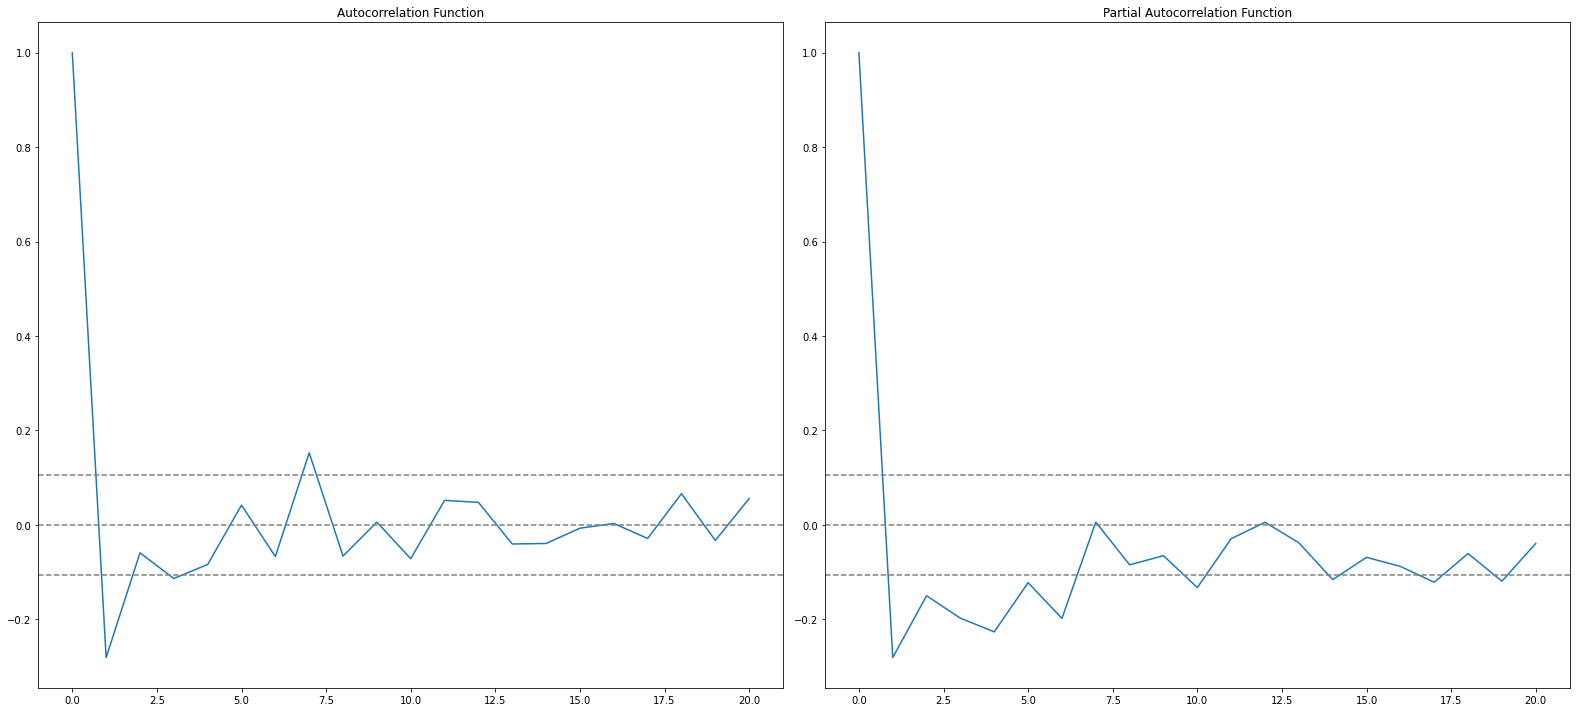

In [18]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')

# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Two dotted lines are the confidence interevals. We use these lines to determine the ‘p’ and ‘q’ values

    Choosing p: The lag value where the PACF chart crosses the upper confidence interval for the first time. p=1.
    Choosing q: The lag value where the ACF chart crosses the upper confidence interval for the first time. q=1.


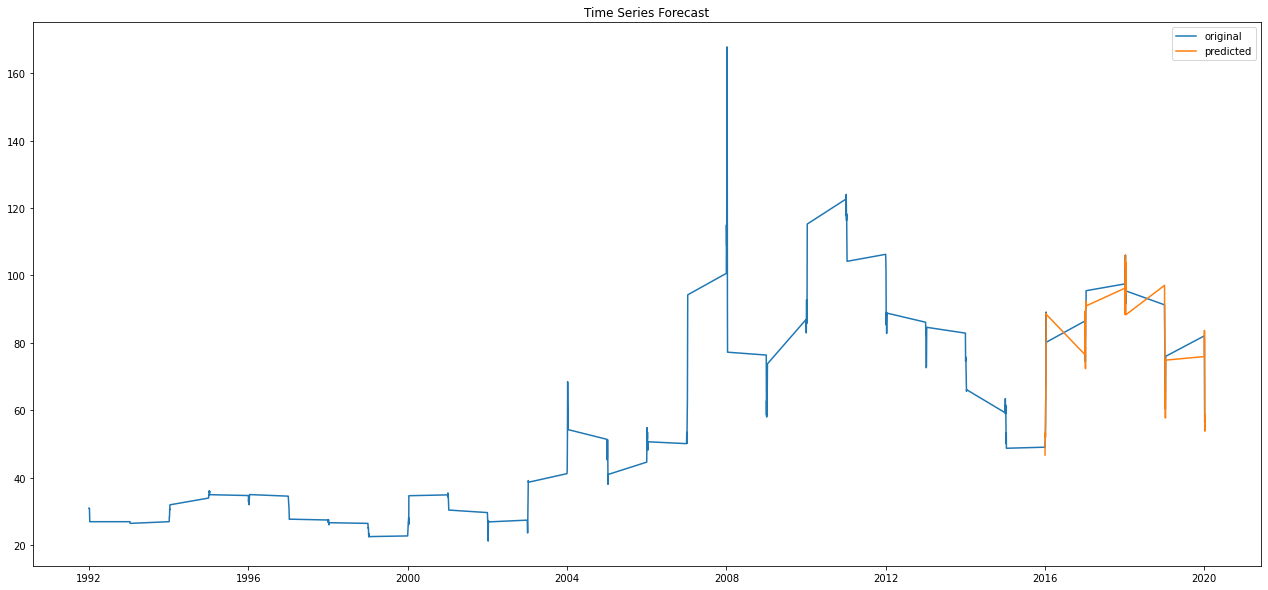

In [19]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime
import warnings
warnings.filterwarnings("ignore")

# fit model
model = ARIMA(ts, order=(1,0,1))
model_fit = model.fit(disp=0)
#print(model_fit.summary())

# predict from and to these dates
start_index = datetime(2016, 1, 1)
end_index = datetime(2020, 1, 7)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(df.Date,df['Coal.SA'],label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
actual=ts[-55:]
actual =actual.values
error = mean_squared_error(actual, forecast, squared = False)
#let's calculate the metric R^2 to compare all models
#import sklearn.metrics as sm
print("RMSE =",error)
print("R^2 score =", round(r2_score(actual, forecast), 2))
# if R^2 is nearly 1, it's the best case.

RMSE = 5.113200997650385
R^2 score = 0.9
